In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import pickle
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.utils.extmath import randomized_svd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import *
from sklearn.svm import SVC, LinearSVC
import itertools


from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [57]:
df = pd.read_csv("dataset.csv")
print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
df.head()

Number of data points :  2072
Number of features :  9


,Unnamed: 0,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,590,Having made a massive impact in Saudi Arabia w...,Having made a massive impact in Saudi Arabia w...,"['singhs', 'rooting', 'cool', 'saudi', 'style'...",NaN,[],https://www.msn.com/en-in/entertainment/other/...,cricket,sports
1,388,Cricket is all about the emotional rollercoast...,"No matter which team fans hope to win, every s...","['wants', 'fans', 'finals', 'cup', 'win', 'tou...",NaN,[],https://www.prnewswire.com:443/news-releases/c...,cricket,sports
2,423,New Zealand announces back-to-back tours next ...,New Zealand announces back-to-back tours next ...,"['test', 'west', 'tour', 'zealand', 'world', '...",2021-12-20 00:00:00,[],https://www.aljazeera.com/news/2021/12/20/cric...,cricket,sports
3,563,It's not the first time cricket fans in the co...,Billed as one of the pre-tournament favourites...,"['qualify', 'afghanistan', 'cup', 'world', 'ze...",NaN,[],https://www.msn.com/en-in/news/other/t20-world...,cricket,sports
4,634,An employee works on a computer terminal again...,"REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...","['success', 'tech', 'startup', 'talent', 'onli...",2021-10-11 00:00:00,['Una Galani'],https://www.reuters.com/breakingviews/india-in...,cricket,sports


In [58]:
print(df['full_text'][1])

Cricket is all about the emotional rollercoaster. No matter which team fans hope to win, every single match causes you to engage mentally and emotionally, and every emotion deserves a portrait. OPPO wants to help customers capture those moments and turn them into memories, through stunning portrait photography and videography.

Smashing a century in cricket is a milestone that every batsman wants to achieve, but scoring a hundred runs in the shortest format of the game is a rare accomplishment. OPPO is encouraging fans to share the essence of this superlative feat using the hashtag #OPPOCenturyMoment and get their chance to win tickets to the ICC Men's T20 World Cup finals.

To enter, OPPO and cricket fans can use the hashtag #OPPOCenturyMoment while posting relevant ICC or emotion related content, tagging, and interacting with the @OPPOArabia. Whether it's a surprise turn in the match, an unexpected LBW, or just the desire to see the game live, content that is cricket relevant will be

Text(0.5, 0, 'Count')

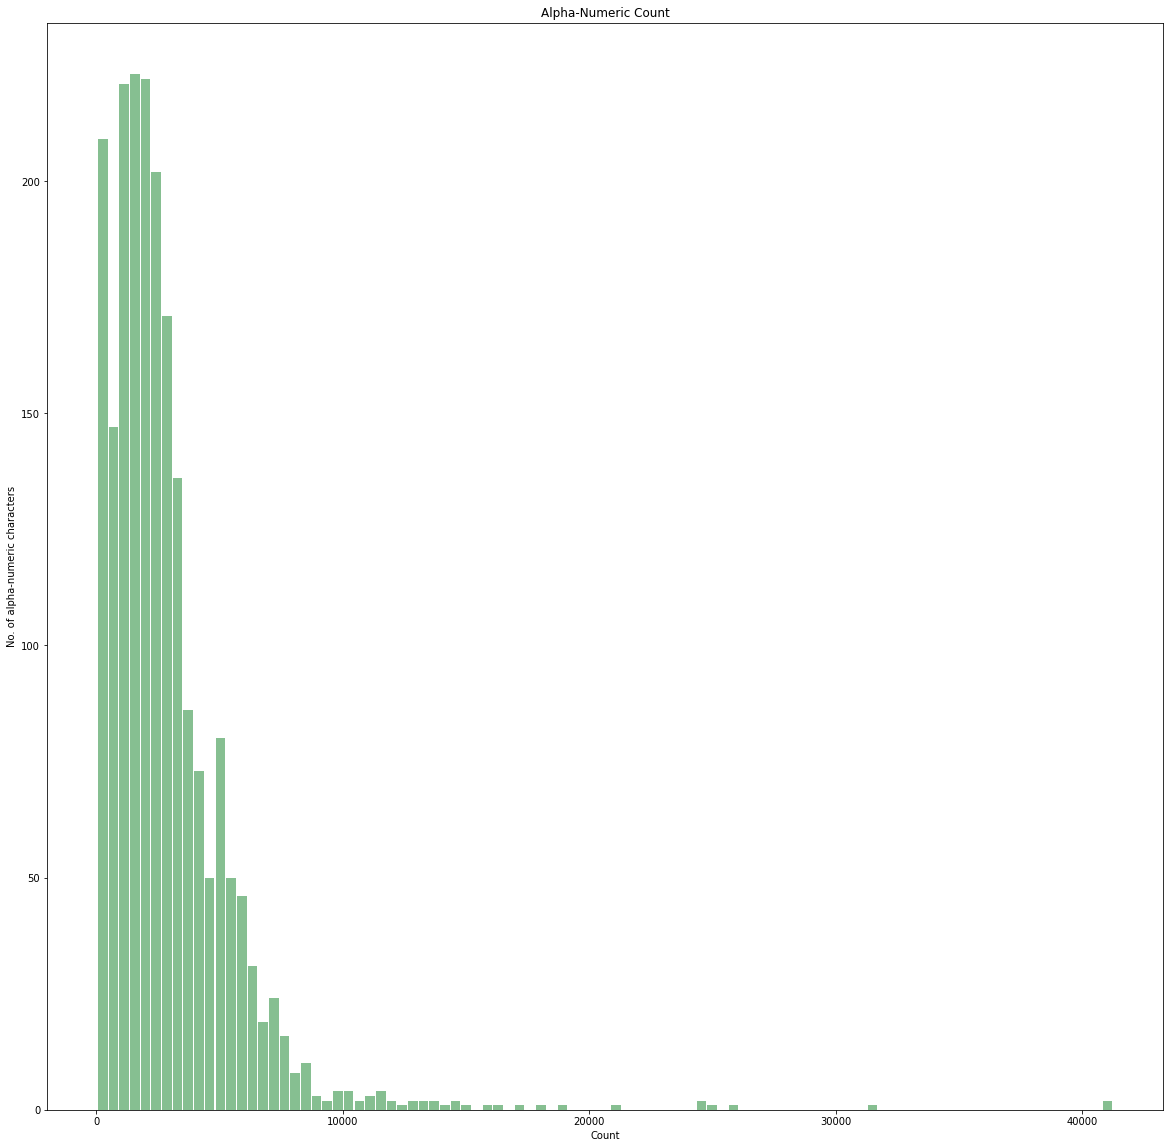

In [66]:
df['Alpha-Numeric Count'] = df.full_text.str.len()
ax = df.hist(column='Alpha-Numeric Count', bins=95, grid=False, figsize=(20,20), color='#86bf91', zorder=2, rwidth=0.9)
plt.ylabel('No. of alpha-numeric characters')
plt.xlabel('Count')

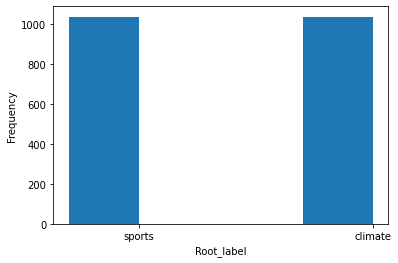

In [62]:
from collections import Counter
counter = Counter(df['root_label'])
root_names = counter.keys()
root_counts = counter.values()

# Plot histogram using matplotlib bar().
width = 0.3
indexes = np.arange(len(root_names))
plt.bar(indexes, root_counts, width)
plt.xticks(indexes + width * 0.5, root_names)
plt.ylabel('Frequency')
plt.xlabel('Root_label')
plt.show()

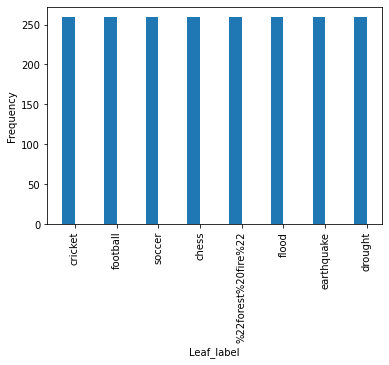

In [65]:
counter = Counter(df['leaf_label'])
leaf_names = counter.keys()
leaf_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(leaf_names))
plt.bar(indexes, leaf_counts, width)
plt.xticks(indexes + width * 0.5, leaf_names, rotation =90)
plt.ylabel('Frequency')
plt.xlabel('Leaf_label')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

In [10]:
train['full_text']

1175    First-ever use of tree DNA in prosecution send...
148     © Getty Images Pakistan defeated India by 10 w...
1296    On September 1, 2021, the remnants of Hurrican...
1053    Our Most Popular Magazines + Digital\n\nWe get...
835     A scholarship has now been established to hono...
                              ...                        
2040    (Des Moines, IA) -- Iowa Farmers have harveste...
434     – FOX Sports released some clips of WWE Champi...
161     The notion of biting into a bug or chewing on ...
681     Houston is in the running to be named one of 1...
877     © AFP Magnus Carlsen retains his title of worl...
Name: full_text, Length: 1657, dtype: object

In [11]:
test

,full_text,root_label
858,If you want to have a backup of Windows 11 ins...,sports
903,The rickety system that determines glory in gl...,sports
28,Western Australian cricket officials have resp...,sports
378,Giants begin Raiders prep with 3 players in CO...,sports
1692,The Jason Takes Manhattan-esque horror comic M...,climate
...,...,...
380,The Cardinals will face veteran quarterback An...,sports
809,"NEW YORK, N.Y., Nov 05, 2021 (SEND2PRESS NEWSW...",sports
1101,Opinion Article\n\n4 October 2021\n\nLast year...,climate
151,When a much-awaited film has been delayed and ...,sports


In [12]:
#train_unclean, test_unclean = train_test_split(df[["full_text","root_label"]], test_size=0.2)

In [13]:
print('Number of data points in train data:', train.shape[0])
print('Number of data points in test data:', test.shape[0])

Number of data points in train data: 1657
Number of data points in test data: 415


### FEATURE EXTRACTION

In [14]:
import re
def clean(text):
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    texter = re.sub(r"[0-9]","", texter)
    texter = re.sub('[^a-zA-Z0-9\n]', ' ', texter)
    texter = re.sub('\s+',' ', texter)
    texter = texter.lower()
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [15]:
train_clean = train['full_text'].apply(clean)

In [16]:
train_clean

1175    first ever use of tree dna in prosecution send...
148      getty images pakistan defeated india by wicke...
1296    on september the remnants of hurricane ida str...
1053    our most popular magazines digital we get it y...
835     a scholarship has now been established to hono...
                              ...                        
2040     des moines ia iowa farmers have harvested nea...
434      fox sports released some clips of wwe champio...
161     the notion of biting into a bug or chewing on ...
681     houston is in the running to be named one of u...
877      afp magnus carlsen retains his title of world...
Name: full_text, Length: 1657, dtype: object

In [17]:
train

,full_text,root_label
1175,First-ever use of tree DNA in prosecution send...,climate
148,© Getty Images Pakistan defeated India by 10 w...,sports
1296,"On September 1, 2021, the remnants of Hurrican...",climate
1053,Our Most Popular Magazines + Digital\n\nWe get...,climate
835,A scholarship has now been established to hono...,sports
...,...,...
2040,"(Des Moines, IA) -- Iowa Farmers have harveste...",climate
434,– FOX Sports released some clips of WWE Champi...,sports
161,The notion of biting into a bug or chewing on ...,sports
681,Houston is in the running to be named one of 1...,sports


In [18]:
train['full_text']= train['full_text'].apply(clean)
train['full_text'][1]

'cricket is all about the emotional rollercoaster no matter which team fans hope to win every single match causes you to engage mentally and emotionally and every emotion deserves a portrait oppo wants to help customers capture those moments and turn them into memories through stunning portrait photography and videography smashing a century in cricket is a milestone that every batsman wants to achieve but scoring a hundred runs in the shortest format of the game is a rare accomplishment oppo is encouraging fans to share the essence of this superlative feat using the hashtag oppocenturymoment and get their chance to win tickets to the icc men s t world cup finals to enter oppo and cricket fans can use the hashtag oppocenturymoment while posting relevant icc or emotion related content tagging and interacting with the oppoarabia whether it s a surprise turn in the match an unexpected lbw or just the desire to see the game live content that is cricket relevant will be entered into a draw t

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import pos_tag
from pickle import dump

counts = []

wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]


def rmv_nums(doc):
    #gets rid of numbers including floats
    #does lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag
    return (word for word in lemmatize_sent(analyzer(doc)) 
            if not word.isdigit())

#CountVectorizer returns a callable that handles preprocessing and tokenization
#Use the “english” stopwords of the CountVectorizer
vectorizer=CountVectorizer(analyzer=rmv_nums,min_df=3,stop_words='english')

#do feature extraction (train):
X_train_counts=vectorizer.fit_transform(train["full_text"]) #get matrix of doc-term counts (training data)
print('Size of training data after lemmatization but before TF-IDF: ', X_train_counts.shape) 
X_test_counts=vectorizer.transform(test["full_text"]) 
print('Size of testing data after lemmatization but before TF-IDF:  ', X_test_counts.shape) 

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print('Shape of train TF-IDF matrix: ',X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print('Shape of test TF-IDF matrix:  ',X_test_tfidf.shape)

Size of training data after lemmatization but before TF-IDF:  (1657, 10159)
Size of testing data after lemmatization but before TF-IDF:   (415, 10159)
Shape of train TF-IDF matrix:  (1657, 10159)
Shape of test TF-IDF matrix:   (415, 10159)


In [20]:
vectorizer

CountVectorizer(analyzer=<function rmv_nums at 0x7f80a04d1f70>, min_df=3,
                stop_words='english')

In [21]:
train['full_text']

1175    first ever use of tree dna in prosecution send...
148      getty images pakistan defeated india by wicke...
1296    on september the remnants of hurricane ida str...
1053    our most popular magazines digital we get it y...
835     a scholarship has now been established to hono...
                              ...                        
2040     des moines ia iowa farmers have harvested nea...
434      fox sports released some clips of wwe champio...
161     the notion of biting into a bug or chewing on ...
681     houston is in the running to be named one of u...
877      afp magnus carlsen retains his title of world...
Name: full_text, Length: 1657, dtype: object

### Dimensionality Reduction

In [75]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42, n_iter = 7)
X_train_LSI = svd.fit_transform(X_train_tfidf)
X_test_LSI = svd.transform(X_test_tfidf)
print('LSI train:')
print(X_train_LSI.shape)
print('LSI test:')
print(X_test_LSI.shape)

LSI train:
(1657, 50)
LSI test:
(415, 50)


In [76]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=50, init = 'random', random_state=42, max_iter=1000)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.transform(X_test_tfidf)
print('NMF train:')
print(X_train_NMF.shape)
print('NMF test:')
print(X_test_NMF.shape)

NMF train:
(1657, 50)
NMF test:
(415, 50)


In [81]:
from sklearn.utils.extmath import randomized_svd
u,sigma,vt = randomized_svd(X_train_tfidf,n_components=50, random_state = 42)
x_50 = np.dot(np.dot(u,np.diag(sigma)),vt)
lsi_frobenius = np.sqrt(np.sum(np.square(x_50-X_train_tfidf)))
print("Frobenius Norm for LSI train data: \n" + str(lsi_frobenius))

u1,sigma1,vt1 = randomized_svd(X_test_tfidf,n_components=50, random_state = 42)
x_50_test = np.dot(np.dot(u1,np.diag(sigma1)),vt1)
lsi_frobenius_test = np.sqrt(np.sum(np.square(x_50_test - X_test_tfidf)))
print("Frobenius Norm for LSI test data: \n" + str(lsi_frobenius_test))

Frobenius Norm for LSI train data: 
31.79317655905423
Frobenius Norm for LSI test data: 
15.032038613679044


In [25]:
print(svd.explained_variance_ratio_)

[0.01634057 0.02099129 0.01771149 0.0162266  0.01377163 0.01227145
 0.01057294 0.01026353 0.00974354 0.00846665 0.00809612 0.00779402
 0.00773137 0.00679451 0.00614209 0.00553592 0.0053271  0.00477895
 0.00441257 0.00428568 0.00416356 0.0041501  0.00395493 0.00391727
 0.00377559 0.00371537 0.00365749 0.00362491 0.0035477  0.00343153
 0.0033572  0.00331609 0.00321985 0.00317847 0.00315384 0.00304364
 0.00297803 0.00295594 0.00284428 0.00284126 0.00275195 0.00274358
 0.00267233 0.0026652  0.0026433  0.00259663 0.00255216 0.00251017
 0.00248061 0.00244856]


In [26]:
print(svd.explained_variance_ratio_.sum())

0.29214958645171857


Text(0.5, 0, 'k')

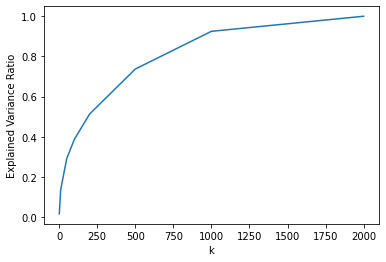

In [69]:
from sklearn.decomposition import TruncatedSVD

def LSI_compute (num_comp):
    svd1 = TruncatedSVD(n_components=num_comp, random_state=42, n_iter = 7)
    X_train_LSI_1 = svd1.fit_transform(X_train_tfidf)
    X_test_LSI_1 = svd1.transform(X_test_tfidf)
    return svd1.explained_variance_ratio_.sum()

k = [1,10,50,100,200,500,1000,2000]
final_variance = []
for i in k :
    final_variance.append(LSI_compute(i))
    
plt.plot(k,final_variance)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('k')

Text(0.5, 0, 'k')

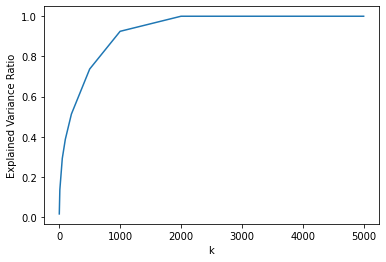

In [70]:
k1 = [1,10,50,100,200,500,1000,2000,2500,3000,5000]
final_variance = []
for i in k1 :
    final_variance.append(LSI_compute(i))
    
plt.plot(k1,final_variance)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('k')

In [83]:
WH = np.dot(X_train_NMF, nmf.components_)
nmf_frobenius = np.sqrt(np.sum(np.square(WH-X_train_tfidf)))
print("NMF Frobenius Norm for train data:\n" + str(nmf_frobenius))

WH1 = np.dot(X_test_NMF, nmf.components_)
nmf_frobenius1 = np.sqrt(np.sum(np.square(WH1-X_test_tfidf)))
print("NMF Frobenius Norm for test data:\n" + str(nmf_frobenius1))

NMF Frobenius Norm for train data:
32.1469440048339
NMF Frobenius Norm for test data:
16.465989044673552


In [29]:
y_train_encoded = train["root_label"].copy()
y_test_encoded = test["root_label"].copy()

y_train_encoded[y_train_encoded == 'sports'] = 0
y_test_encoded[y_test_encoded == 'sports'] = 0


y_train_encoded[y_train_encoded== 'climate'] = 1
y_test_encoded[y_test_encoded == 'climate'] = 1

print("Training Set\n")
print("Original train_dataset:\n" + str(train["root_label"][0:20]))
print("\nBinarized train_dataset:\n" + str(y_train_encoded[0:20]))
print("\nTest Set\n")
print("Original test_dataset:\n" + str(test["root_label"][0:20]))
print("\nBinarized test_dataset:\n" + str(y_test_encoded[0:20]))

Training Set

Original train_dataset:
1175    climate
148      sports
1296    climate
1053    climate
835      sports
687      sports
969      sports
649      sports
1014     sports
1337    climate
1646    climate
220      sports
124      sports
897      sports
1333    climate
876      sports
1156    climate
899      sports
1625    climate
898      sports
Name: root_label, dtype: object

Binarized train_dataset:
1175    1
148     0
1296    1
1053    1
835     0
687     0
969     0
649     0
1014    0
1337    1
1646    1
220     0
124     0
897     0
1333    1
876     0
1156    1
899     0
1625    1
898     0
Name: root_label, dtype: object

Test Set

Original test_dataset:
858      sports
903      sports
28       sports
378      sports
1692    climate
1857    climate
367      sports
1166    climate
1730    climate
55       sports
495      sports
2020    climate
1577    climate
394      sports
682      sports
1837    climate
1008     sports
428      sports
1278    climate
2024    climat

### SVM

In [30]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          classes = ['sports', 'climate']
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [31]:
def calculate_fpr_tpr(prob_func, labels):
#     scores = model.decision_function(data)
    fpr, tpr, thresholds = metrics.roc_curve(labels,prob_func,pos_label=1)
    return fpr, tpr

def predict_calculate_svc(train_set, test_set, binary_train_target, binary_test_target, gamma='auto', C=1.0):
    plt.gcf().clear()
    svc = svm.SVC(C = C, probability=True, kernel='linear')
    svc.fit(train_set, binary_train_target)
    svc_predicted = svc.predict(test_set)

    print('gamma: '+ str(gamma))
    print('Accuracy: ' + str(metrics.accuracy_score(binary_test_target.ravel(), svc_predicted)))
    print('Precision: ' + str(metrics.precision_score(binary_test_target.ravel(), svc_predicted)))
    print('Recall: ' + str(metrics.recall_score(binary_test_target.ravel(), svc_predicted)))
    print('F-1 Score: ' + str(metrics.f1_score(binary_test_target.ravel(), svc_predicted)))
    
    #compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(binary_test_target, svc_predicted)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
    plt.show() 
    
    # calculate fpr_tpr
    fpr, tpr = calculate_fpr_tpr(svc.decision_function(test_set), binary_test_target)
    return fpr, tpr

SVM using LSI
gamma: auto
Accuracy: 0.9686746987951808
Precision: 0.9696969696969697
Recall: 0.964824120603015
F-1 Score: 0.9672544080604534
Confusion matrix, without normalization
[[210   6]
 [  7 192]]


<Figure size 432x288 with 0 Axes>

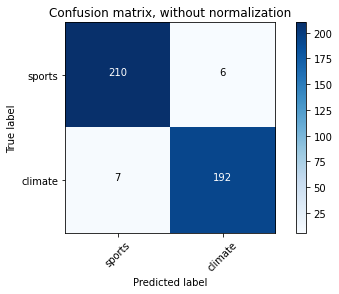

In [32]:
# fprs tprs lists
fprs_hard = []
tprs_hard = []
print('SVM using LSI')
fpr_hard,tpr_hard = predict_calculate_svc(X_train_LSI, X_test_LSI, y_train_encoded.astype(str).astype(int), y_test_encoded.astype(str).astype(int)
                                ,C=1000)
fprs_hard.append(fpr_hard)
tprs_hard.append(tpr_hard)

SVM using LSI
gamma: auto
Accuracy: 0.4795180722891566
Precision: 0.4795180722891566
Recall: 1.0
F-1 Score: 0.6482084690553745
Confusion matrix, without normalization
[[  0 216]
 [  0 199]]


<Figure size 432x288 with 0 Axes>

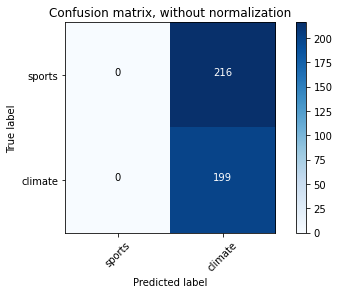

In [33]:
# fprs tprs lists
fprs_soft = []
tprs_soft = []
print('SVM using LSI')
fpr_soft,tpr_soft = predict_calculate_svc(X_train_LSI, X_test_LSI, y_train_encoded.astype(str).astype(int), y_test_encoded.astype(str).astype(int)
                                ,C=0.0001)
fprs_soft.append(fpr_soft)
tprs_soft.append(tpr_soft)

SVM using LSI
gamma: auto
Accuracy: 0.9662650602409638
Precision: 0.964824120603015
Recall: 0.964824120603015
F-1 Score: 0.964824120603015
Confusion matrix, without normalization
[[209   7]
 [  7 192]]


<Figure size 432x288 with 0 Axes>

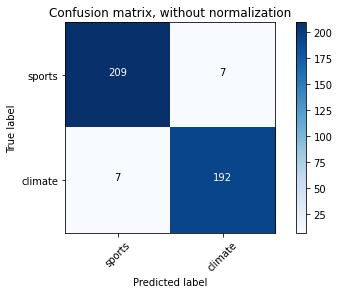

In [34]:
fprs = []
tprs = []
print('SVM using LSI')
fpr,tpr = predict_calculate_svc(X_train_LSI, X_test_LSI, y_train_encoded.astype(str).astype(int), y_test_encoded.astype(str).astype(int)
                                ,C=100000)
fprs.append(fpr)
tprs.append(tpr)

In [90]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6]}
svm_cv = svm.SVC(probability = True)
svm_cv_grid = GridSearchCV(svm_cv, parameters, cv=5)
svm_cv_grid.fit(X_train_LSI, y_train_encoded.astype(str).astype(int))

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000, 1000000]})

In [91]:
pd.DataFrame(svm_cv_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.481494,0.007691,0.062445,0.003739,0.001,{'C': 0.001},0.506024,0.506024,0.504532,0.504532,0.504532,0.505129,0.000731,10
1,0.476730,0.001404,0.064847,0.000613,0.01,{'C': 0.01},0.602410,0.641566,0.613293,0.628399,0.610272,0.619188,0.014010,9
2,0.281396,0.001277,0.034669,0.000123,0.1,{'C': 0.1},0.957831,0.933735,0.951662,0.972810,0.945619,0.952331,0.012969,8
3,0.126718,0.002199,0.015146,0.000286,1,{'C': 1},0.969880,0.936747,0.957704,0.987915,0.951662,0.960781,0.017259,2
4,0.094984,0.003725,0.009885,0.000393,10,{'C': 10},0.969880,0.948795,0.966767,0.984894,0.969789,0.968025,0.011511,1
5,0.098765,0.005101,0.008979,0.000580,100,{'C': 100},0.960843,0.948795,0.960725,0.963746,0.960725,0.958967,0.005216,3
6,0.099830,0.004993,0.008947,0.000672,1000,{'C': 1000},0.960843,0.948795,0.963746,0.963746,0.954683,0.958363,0.005817,4
7,0.099168,0.005631,0.008921,0.000683,10000,{'C': 10000},0.960843,0.948795,0.963746,0.963746,0.954683,0.958363,0.005817,4
8,0.099890,0.004854,0.008940,0.000668,100000,{'C': 100000},0.960843,0.948795,0.963746,0.963746,0.954683,0.958363,0.005817,4
9,0.099910,0.005294,0.008911,0.000679,1000000,{'C': 1000000},0.960843,0.948795,0.963746,0.963746,0.954683,0.958363,0.005817,4


In [92]:
pd.DataFrame(svm_cv_grid.cv_results_)[['param_C','mean_test_score','rank_test_score']]

,param_C,mean_test_score,rank_test_score
0,0.001,0.505129,10
1,0.01,0.619188,9
2,0.1,0.952331,8
3,1,0.960781,2
4,10,0.968025,1
5,100,0.958967,3
6,1000,0.958363,4
7,10000,0.958363,4
8,100000,0.958363,4
9,1000000,0.958363,4


SVM using LSI with Cross-Validation

gamma: auto
Accuracy: 0.963855421686747
Precision: 0.9742268041237113
Recall: 0.949748743718593
F-1 Score: 0.9618320610687022
Confusion matrix, without normalization
[[211   5]
 [ 10 189]]


<Figure size 432x288 with 0 Axes>

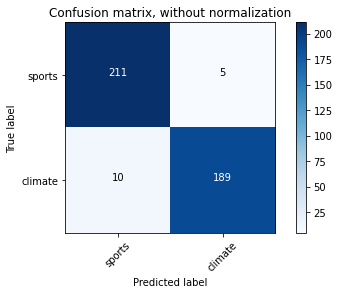

In [88]:
fprs_best = []
tprs_best = []
print('SVM using LSI with Cross-Validation\n')
fpr_best,tpr_best = predict_calculate_svc(X_train_LSI, X_test_LSI, y_train_encoded.astype(str).astype(int), y_test_encoded.astype(str).astype(int)
                                ,C=10)
fprs_best.append(fpr_best)
tprs_best.append(tpr_best)

# Comparision between Hard, Soft and Best Margin SVMs

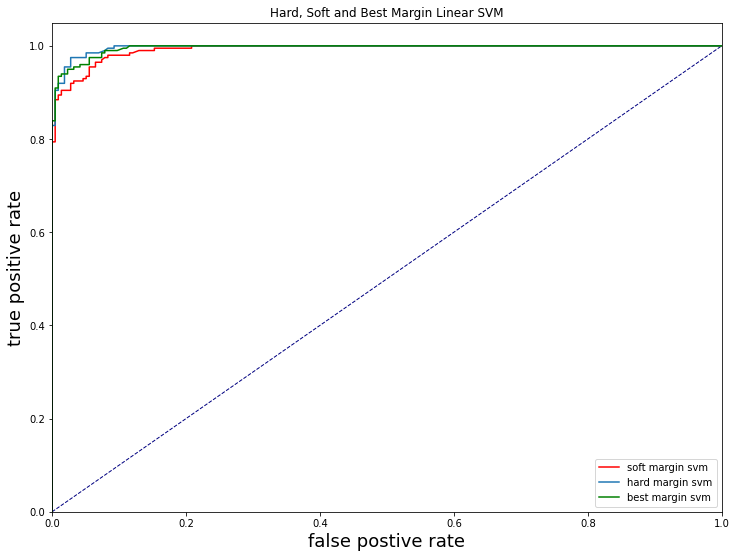

area under hard svm curve 0.9965452261306532
area under soft svm curve 0.9923110924995349
area under best svm curve 0.9957077051926299


In [89]:
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=23)

plt.plot(fpr_soft, tpr_soft, 'r', label='soft margin svm')
plt.plot(fpr_hard, tpr_hard, label='hard margin svm')
plt.plot(fpr_best, tpr_best,'g',label = 'best margin svm')
plt.legend()
plt.title('Hard, Soft and Best Margin Linear SVM')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.show()

# area under the curve:
roc_auc_hard = auc(fpr_hard,tpr_hard)
roc_auc_soft = auc(fpr_soft,tpr_soft)
roc_auc_best = auc(fpr_best,tpr_best)
print("area under hard svm curve", roc_auc_hard)
print("area under soft svm curve", roc_auc_soft)
print("area under best svm curve", roc_auc_best)



# Logistic regression with Lbfgs solver

In [40]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}

#Without regularization
logistic_l0 = LogisticRegression(penalty="none", max_iter=10000)
# logistic_l0_grid = GridSearchCV(logistic_l0, parameters) #use logistic regression's default score()?
# logistic_l0_grid.fit(X_train_LSI, y_train_encoded.astype(str).astype(int))
# print(pd.DataFrame(logistic_l0_grid.cv_results_)[['param_C','mean_test_score']])

#With L1 
logistic_l1 = LogisticRegression(solver="liblinear",penalty="l1", max_iter=10000)
logistic_l1_grid = GridSearchCV(logistic_l1, parameters,cv=5) #use logistic regression's default score()?
logistic_l1_grid.fit(X_train_LSI, y_train_encoded.astype(str).astype(int))
print(pd.DataFrame(logistic_l1_grid.cv_results_)[['param_C','mean_test_score']])
print("\n")

#With L2 
logistic_l2 = LogisticRegression(solver="liblinear",penalty="l2", max_iter=10000)
logistic_l2_grid = GridSearchCV(logistic_l2, parameters,cv=5) #use logistic regression's default score()?
logistic_l2_grid.fit(X_train_LSI, y_train_encoded.astype(str).astype(int))
print(pd.DataFrame(logistic_l2_grid.cv_results_)[['param_C','mean_test_score']])


  param_C  mean_test_score
0  0.0001         0.494871
1   0.001         0.494871
2    0.01         0.494871
3     0.1         0.901625
4       1         0.946901
5      10         0.963799
6     100         0.961380
7    1000         0.959568
8   10000         0.960172


  param_C  mean_test_score
0  0.0001         0.701827
1   0.001         0.788141
2    0.01         0.923967
3     0.1         0.948102
4       1         0.955345
5      10         0.959573
6     100         0.962587
7    1000         0.965002
8   10000         0.958963


In [41]:
logistic_l0

LogisticRegression(max_iter=10000, penalty='none')

In [42]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}


#With L1 
logistic_l1 = LogisticRegression(solver="saga",penalty="l1", max_iter=10000)
logistic_l1_grid = GridSearchCV(logistic_l1, parameters,cv=5) #use logistic regression's default score()?
logistic_l1_grid.fit(X_train_LSI, y_train_encoded.astype(str).astype(int))
print(pd.DataFrame(logistic_l1_grid.cv_results_)[['param_C','mean_test_score']])
print("\n")

#With L2 
logistic_l2 = LogisticRegression(solver="saga",penalty="l2", max_iter=10000)
logistic_l2_grid = GridSearchCV(logistic_l2, parameters,cv=5) #use logistic regression's default score()?
logistic_l2_grid.fit(X_train_LSI, y_train_encoded.astype(str).astype(int))
print(pd.DataFrame(logistic_l2_grid.cv_results_)[['param_C','mean_test_score']])


  param_C  mean_test_score
0  0.0001         0.499094
1   0.001         0.505129
2    0.01         0.500906
3     0.1         0.908263
4       1         0.947503
5      10         0.963195
6     100         0.963191
7    1000         0.960172
8   10000         0.959568


  param_C  mean_test_score
0  0.0001         0.505129
1   0.001         0.505129
2    0.01         0.923971
3     0.1         0.945685
4       1         0.955948
5      10         0.958971
6     100         0.962587
7    1000         0.965002
8   10000         0.960776


In [43]:
logistic_l0 = LogisticRegression(penalty="none", max_iter=10000)
logistic_l0_grid = GridSearchCV(logistic_l0, parameters) #use logistic regression's default score()?
logistic_l0_grid.fit(X_train_LSI, y_train_encoded.astype(str).astype(int))
print(pd.DataFrame(logistic_l0_grid.cv_results_)[['param_C','mean_test_score']])


/Users/shwetakatti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shwetakatti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shwetakatti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shwetakatti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shwetakatti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shwetakatti/o

  param_C  mean_test_score
0  0.0001         0.959569
1   0.001         0.959569
2    0.01         0.959569
3     0.1         0.959569
4       1         0.959569
5      10         0.959569
6     100         0.959569
7    1000         0.959569
8   10000         0.959569


/Users/shwetakatti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [44]:
def predict_calculate_logistics(train_set, test_set, binary_train_target, binary_test_target, C, solver ,penalty):
    plt.gcf().clear()
    log = LogisticRegression(penalty=penalty, solver=solver,max_iter=10000, C = C)
    #log = LogisticRegression(penalty=penalty,max_iter=10000, C = C)
    log.fit(train_set, binary_train_target)
    pred = log.predict(test_set)

    print('C value: ' + str(C))
    print('Penalty: ' + str(penalty))
    print('Accuracy: ' + str(metrics.accuracy_score(binary_test_target.ravel(), pred)))
    print('Precision: ' + str(metrics.precision_score(binary_test_target.ravel(), pred)))
    print('Recall: ' + str(metrics.recall_score(binary_test_target.ravel(), pred)))
    print('F-1 Score: ' + str(metrics.f1_score(binary_test_target.ravel(), pred)))   
    print("Coefficient Statistics: ")
    print("mean = %f, std = %f" % (np.mean(log.coef_), np.std(log.coef_)))

    #compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(binary_test_target, pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
    plt.show() 
    
    # calculate fpr_tpr
    fpr, tpr = calculate_fpr_tpr(log.decision_function(test_set), binary_test_target)
    return fpr, tpr

# L0 

Logistic Regression without regularization using LSI
C value: 1.0
Penalty: none
Accuracy: 0.9710843373493976
Precision: 0.9746192893401016
Recall: 0.964824120603015
F-1 Score: 0.9696969696969697
Coefficient Statistics: 
mean = -4.757975, std = 23.274039
Confusion matrix, without normalization
[[211   5]
 [  7 192]]


<Figure size 432x288 with 0 Axes>

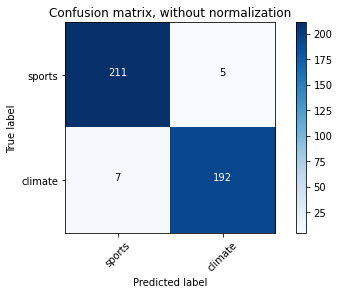

In [45]:
fprs_none = []
tprs_none = []
print('Logistic Regression without regularization using LSI')
fpr_none,tpr_none = predict_calculate_logistics(X_train_LSI, X_test_LSI, y_train_encoded.astype(str).astype(int), y_test_encoded.astype(str).astype(int)
                                ,C = 1.0, solver = 'lbfgs',penalty ='none')
fprs_none.append(fpr_none)
tprs_none.append(tpr_none)

# L1 

Logistic Regression with L1 regularization using LSI
C value: 10
Penalty: l1
Accuracy: 0.9734939759036144
Precision: 0.9795918367346939
Recall: 0.964824120603015
F-1 Score: 0.9721518987341772
Coefficient Statistics: 
mean = -3.449530, std = 12.327500
Confusion matrix, without normalization
[[212   4]
 [  7 192]]


<Figure size 432x288 with 0 Axes>

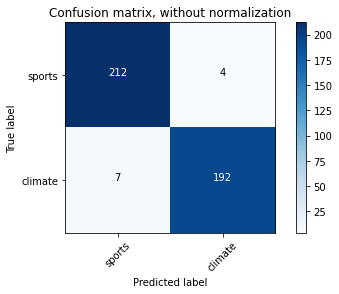

In [46]:
fprs_l1 = []
tprs_l1 = []
print('Logistic Regression with L1 regularization using LSI')
fpr_l1,tpr_l1 = predict_calculate_logistics(X_train_LSI, X_test_LSI, y_train_encoded.astype(str).astype(int), y_test_encoded.astype(str).astype(int)
                                ,solver = "liblinear",C=10, penalty ='l1')
fprs_l1.append(fpr_l1)
tprs_l1.append(tpr_l1)

In [47]:
fpr_l1

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02,
       0.03, 0.03, 0.05, 0.05, 0.06, 0.06, 0.07, 0.07, 0.08, 0.09, 0.45,
       0.47, 0.99, 1.  ])

# L2

Logistic Regression with L2 regularization using LSI
C value: 100
Penalty: l2
Accuracy: 0.9710843373493976
Precision: 0.9746192893401016
Recall: 0.964824120603015
F-1 Score: 0.9696969696969697
Coefficient Statistics: 
mean = -2.900065, std = 9.623926
Confusion matrix, without normalization
[[211   5]
 [  7 192]]


<Figure size 432x288 with 0 Axes>

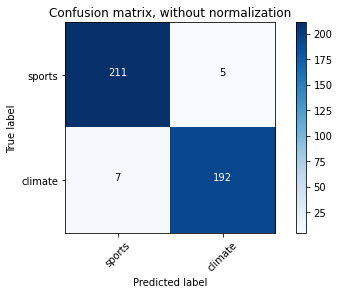

In [48]:
fprs_l2 = []
tprs_l2 = []
print('Logistic Regression with L2 regularization using LSI')
fpr_l2,tpr_l2 = predict_calculate_logistics(X_train_LSI, X_test_LSI, y_train_encoded.astype(str).astype(int), y_test_encoded.astype(str).astype(int)
                                ,solver = "liblinear",C=100, penalty ='l2')
fprs_l2.append(fpr_l2)
tprs_l2.append(tpr_l2)

In [49]:
fpr_l2

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01,
       0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.06, 0.06, 0.06, 0.06, 0.07,
       0.07, 0.07, 0.08, 0.09, 0.47, 0.48, 0.8 , 0.81, 1.  ])

C value: 10
Penalty: liblinear
Accuracy: 0.9734939759036144
Precision: 0.9795918367346939
Recall: 0.964824120603015
F-1 Score: 0.9721518987341772
Coefficient Statistics: 
mean = -3.449452, std = 12.327464
Confusion matrix, without normalization
[[212   4]
 [  7 192]]


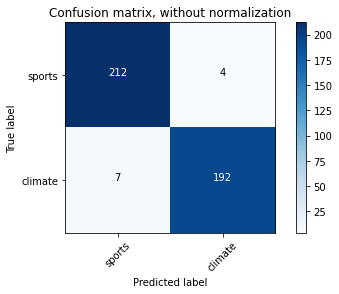

In [50]:
log = LogisticRegression(penalty='l1', solver='liblinear',max_iter=10000, C = 10)
log.fit(X_train_LSI, y_train_encoded.astype(str).astype(int))
pred = log.predict(X_test_LSI)

print('C value: ' + str(10))
print('Penalty: ' + str('liblinear'))
print('Accuracy: ' + str(metrics.accuracy_score(y_test_encoded.astype(str).astype(int).ravel(), pred)))
print('Precision: ' + str(metrics.precision_score(y_test_encoded.astype(str).astype(int).ravel(), pred)))
print('Recall: ' + str(metrics.recall_score(y_test_encoded.astype(str).astype(int).ravel(), pred)))
print('F-1 Score: ' + str(metrics.f1_score(y_test_encoded.astype(str).astype(int).ravel(), pred)))   
print("Coefficient Statistics: ")
print("mean = %f, std = %f" % (np.mean(log.coef_), np.std(log.coef_)))


cnf_matrix = metrics.confusion_matrix(y_test_encoded.astype(str).astype(int), pred)
#np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                  title='Confusion matrix, without normalization')
plt.show() 

# calculate fpr_tpr
fpr, tpr = calculate_fpr_tpr(log.decision_function(X_test_LSI), y_test_encoded.astype(str).astype(int))

In [51]:
print(fpr)
print("\n")
print(tpr)

[0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.02 0.02 0.03 0.03 0.05
 0.05 0.06 0.06 0.07 0.07 0.08 0.09 0.45 0.47 0.99 1.  ]


[0.   0.01 0.22 0.24 0.83 0.83 0.9  0.9  0.94 0.94 0.97 0.97 0.97 0.97
 0.98 0.98 0.98 0.98 0.99 0.99 1.   1.   1.   1.   1.  ]


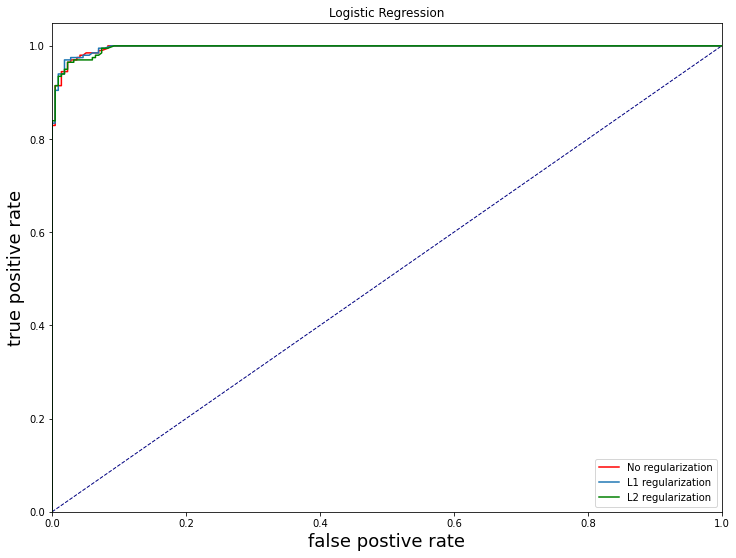

area under no regularization 0.9967778708356597
area under L1 regularization 0.9970105155406664
area under L2 regularization 0.9965219616601525


In [94]:
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=23)

plt.plot(fpr_none,tpr_none, 'r', label='No regularization')
plt.plot(fpr_l1,tpr_l1, label='L1 regularization')
plt.plot(fpr_l2,tpr_l2,'g',label = 'L2 regularization')
plt.legend()
plt.title('Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.show()

# area under the curve:
roc_auc_none = auc(fpr_none,tpr_none)
roc_auc_l1 = auc(fpr_l1,tpr_l1)
roc_auc_l2 = auc(fpr_l2,tpr_l2)
print("area under no regularization", roc_auc_none)
print("area under L1 regularization", roc_auc_l1)
print("area under L2 regularization", roc_auc_l2)



### NAIVE BAYES

In [52]:
from sklearn.naive_bayes import GaussianNB

def predict_calculate_naive_bayes(train_set, test_set, binary_train_target, binary_test_target):
    plt.gcf().clear()
    gnb = GaussianNB()
    gnb.fit(train_set, binary_train_target)
    pred = gnb.predict(test_set)

    print('Accuracy: ' + str(metrics.accuracy_score(binary_test_target.ravel(), pred)))
    print('Precision: ' + str(metrics.precision_score(binary_test_target.ravel(), pred)))
    print('Recall: ' + str(metrics.recall_score(binary_test_target.ravel(), pred)))
    print('F-1 Score: ' + str(metrics.f1_score(binary_test_target.ravel(), pred)))
    
    #compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(binary_test_target, pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
    plt.show() 
    
    # calculate fpr_tpr
    fpr, tpr = calculate_fpr_tpr(gnb.predict_proba(test_set)[:,1], binary_test_target)
    return fpr, tpr


Naive Bayes using LSI
Accuracy: 0.9421686746987952
Precision: 0.9441624365482234
Recall: 0.9346733668341709
F-1 Score: 0.9393939393939393
Confusion matrix, without normalization
[[205  11]
 [ 13 186]]


<Figure size 432x288 with 0 Axes>

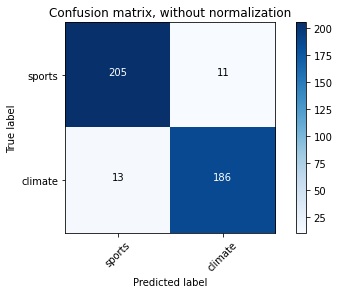

In [53]:
fprs_NB = []
tprs_NB = []
print('Naive Bayes using LSI')
fpr_NB,tpr_NB = predict_calculate_naive_bayes(X_train_LSI, X_test_LSI, y_train_encoded.astype(str).astype(int), y_test_encoded.astype(str).astype(int))
fprs_NB.append(fpr_NB)
tprs_NB.append(tpr_NB)

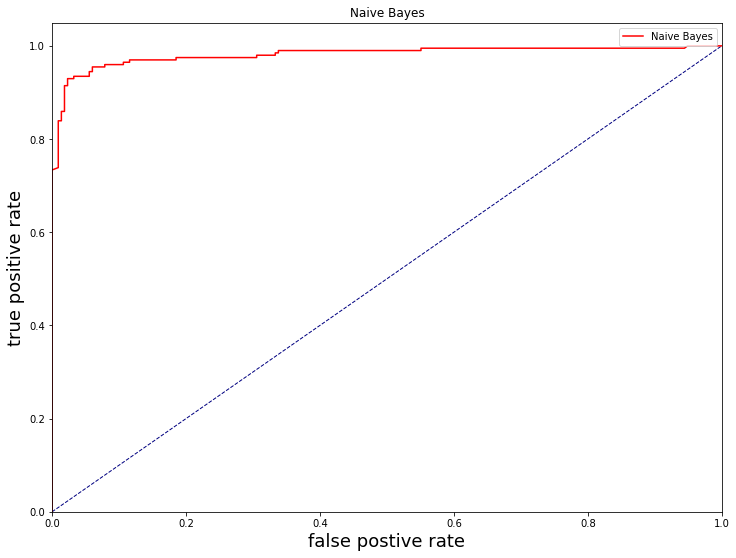

area under Gaussian NB curve 0.9811906756002232


In [54]:
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=23)

plt.plot(fpr_NB, tpr_NB, 'r', label='Naive Bayes')

plt.legend()
plt.title('Naive Bayes')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.show()

# area under the curve:
roc_auc_NB = auc(fpr_NB,tpr_NB)
print("area under Gaussian NB curve", roc_auc_NB)